In [1]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import math
import pandas_datareader.data as web

In [3]:
sns.set_style('whitegrid')
np.random.seed(42)

In [4]:
IT_Companies_names = [ 'AAPL', 'AMZN', 'GOOG', 'FB', 'MSFT',  'HPQ', 'NVDA','NFLX', 'CSCO', 'ADBE', 'IBM', 'TSLA']

In [5]:
def getData(start, end):
  IT_Companies=[]
  IT_Companies.append(web.DataReader('AAPL', 'yahoo', start=start, end=end))  
  IT_Companies.append(web.DataReader('AMZN', 'yahoo', start=start, end=end))
  IT_Companies.append(web.DataReader('GOOG', 'yahoo', start=start, end=end))
  IT_Companies.append(web.DataReader('FB', 'yahoo', start=start, end=end))
  IT_Companies.append(web.DataReader('MSFT', 'yahoo', start=start, end=end))
  IT_Companies.append(web.DataReader('HPQ', 'yahoo', start=start, end=end)) 
  IT_Companies.append(web.DataReader('NVDA', 'yahoo', start=start, end=end)) 
  IT_Companies.append(web.DataReader('NFLX', 'yahoo', start=start, end=end))
  IT_Companies.append(web.DataReader('CSCO', 'yahoo', start=start, end=end))
  IT_Companies.append(web.DataReader('ADBE', 'yahoo', start=start, end=end)) 
  IT_Companies.append(web.DataReader('IBM', 'yahoo', start=start, end=end))
  IT_Companies.append(web.DataReader('TSLA', 'yahoo', start=start, end=end))
  return IT_Companies

In [6]:
start='2010-01-01'
end='2021-12-31'
IT_Companies=getData(start, end)
IT_Companies

[                  High         Low  ...       Volume   Adj Close
 Date                                ...                         
 2010-01-04    7.660714    7.585000  ...  493729600.0    6.553024
 2010-01-05    7.699643    7.616071  ...  601904800.0    6.564354
 2010-01-06    7.686786    7.526786  ...  552160000.0    6.459941
 2010-01-07    7.571429    7.466071  ...  477131200.0    6.447997
 2010-01-08    7.571429    7.466429  ...  447610800.0    6.490866
 ...                ...         ...  ...          ...         ...
 2021-12-27  180.419998  177.070007  ...   74919600.0  180.330002
 2021-12-28  181.330002  178.529999  ...   79144300.0  179.289993
 2021-12-29  180.630005  178.139999  ...   62348900.0  179.380005
 2021-12-30  180.570007  178.089996  ...   59773000.0  178.199997
 2021-12-31  179.229996  177.259995  ...   64025500.0  177.570007
 
 [3021 rows x 6 columns],
                    High          Low  ...    Volume    Adj Close
 Date                                  ...      

In [7]:
for i in range(len(IT_Companies)):
  IT_Companies[i]['Close_Average']=IT_Companies[i]['Close']
  IT_Companies[i] = IT_Companies[i].asfreq('D')
  #filling missing data for certain days 
  IT_Companies[i]=IT_Companies[i].fillna(method='ffill')

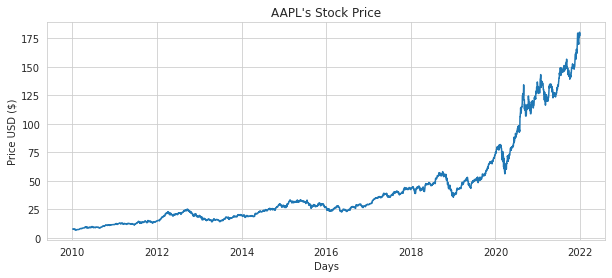

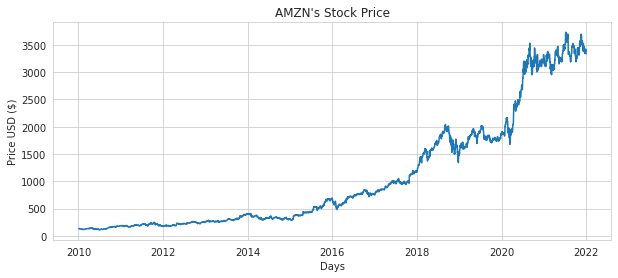

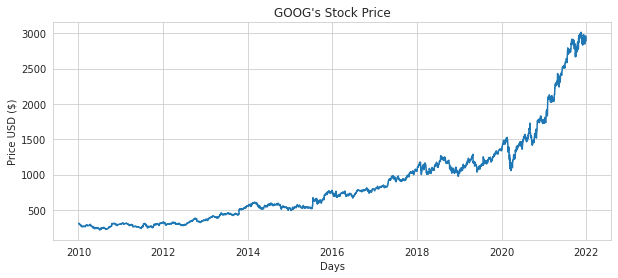

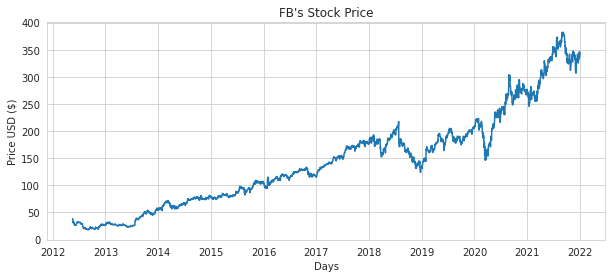

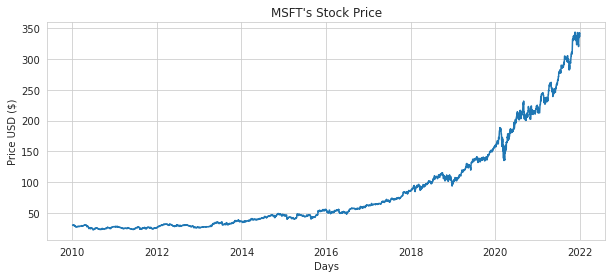

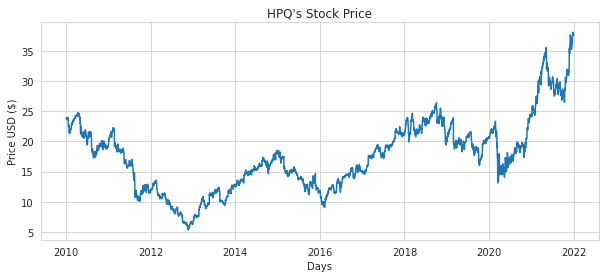

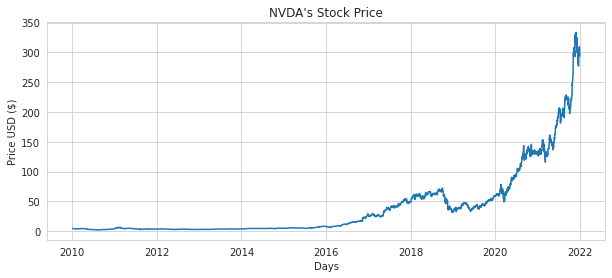

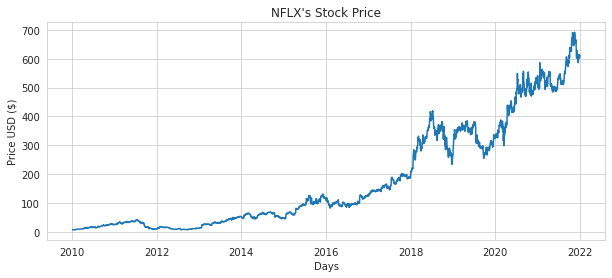

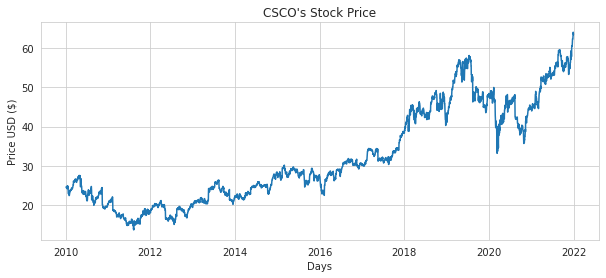

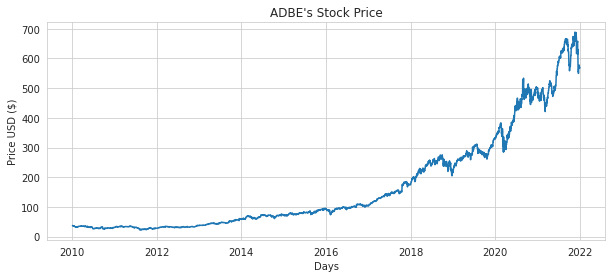

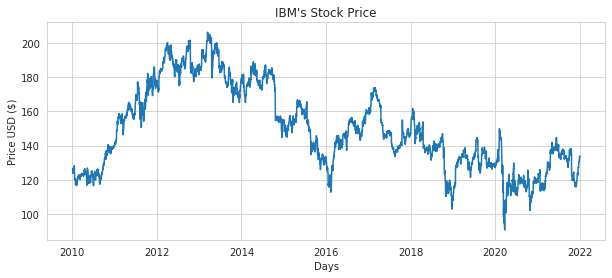

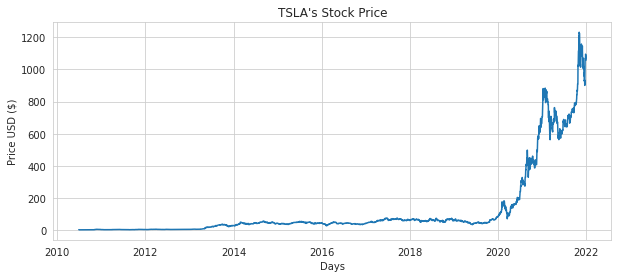

In [8]:
for i in range (len(IT_Companies)):
  #Visualize the close price Data
  plt.figure(figsize=(10, 4))
  plt.title(IT_Companies_names[i]+"'s Stock Price")
  plt.xlabel("Days")
  plt.ylabel("Price USD ($)")
  plt.plot(IT_Companies[i]['Close_Average'])
  plt.show()

In [9]:
# Generating sequences from our time series
def create_univariate_one_step_data(data, window_size):
    n = len(data)
    y = data[window_size:]
    data = data.values.reshape(-1, 1) # make 2D
    X = np.hstack(tuple([data[i:n-j, :] for i, j in enumerate(range(window_size, 0, -1))]))
    print(X.shape)
    print(y.shape)
    return pd.DataFrame(X, index=y.index), y

In [10]:
# a window_size=63 to obtain a two-dimensional dataset of shape number of samples x number of timesteps
window_size = 63
X=[i for i in range(len(IT_Companies))]
y=[i for i in range(len(IT_Companies))]
for i in range(len(IT_Companies)):
  X[i], y[i] = create_univariate_one_step_data(IT_Companies[i]["Close_Average"], window_size=window_size)

(4317, 63)
(4317,)
(4317, 63)
(4317,)
(4317, 63)
(4317,)
(3452, 63)
(3452,)
(4317, 63)
(4317,)
(4317, 63)
(4317,)
(4317, 63)
(4317,)
(4317, 63)
(4317,)
(4317, 63)
(4317,)
(4317, 63)
(4317,)
(4317, 63)
(4317,)
(4141, 63)
(4141,)


In [11]:
xtrain=[i for i in range(len(IT_Companies))]
ytrain=[i for i in range(len(IT_Companies))]
xtest=[i for i in range(len(IT_Companies))]
ytest=[i for i in range(len(IT_Companies))]
for i in range(len(IT_Companies)):
  # Train
  xtrain[i] = X[i][:'2020-12-31'].values.reshape(-1, window_size)
  ytrain[i] = y[i][:'2020-12-31']

  # test
  xtest[i] = X[i]['2021-01-01':].values.reshape(-1, window_size)
  ytest[i] = y[i]['2021-01-01':]
  print(xtrain[i].shape)

(3952, 63)
(3952, 63)
(3952, 63)
(3087, 63)
(3952, 63)
(3952, 63)
(3952, 63)
(3952, 63)
(3952, 63)
(3952, 63)
(3952, 63)
(3776, 63)


In [12]:
# Creating the decision tree regressor model
models=[i for i in range(len(IT_Companies))]
for i in range(len(IT_Companies)):
  models[i] = DecisionTreeRegressor(max_depth=5).fit(xtrain[i], ytrain[i])

In [13]:
treePredictions_train=[i for i in range(len(IT_Companies))]
for i in range(len(IT_Companies)):
  treePredictions_train[i] = models[i].predict(xtrain[i])

In [14]:
#model tree prediction
treePredictions=[i for i in range(len(IT_Companies))]
mse=[i for i in range(len(IT_Companies))]
rmse=[i for i in range(len(IT_Companies))]
mae=[i for i in range(len(IT_Companies))]
for i in range(len(IT_Companies)):
  treePredictions[i] = models[i].predict(xtest[i])
  mse[i] = mean_squared_error(treePredictions[i], ytest[i])
  mae[i]= mean_absolute_error(treePredictions[i], ytest[i])
  rmse[i] = math.sqrt(mean_squared_error(treePredictions[i], ytest[i]))

In [15]:
df= pd.DataFrame({'mae':mae, 'rmse': rmse}, index=IT_Companies_names)

cm = sns.light_palette("green", as_cmap=True)

df.style.background_gradient(cmap=cm).set_precision(2)

,mae,rmse
AAPL,12.10,16.84
AMZN,68.22,93.24
GOOG,688.73,778.62
FB,46.70,55.44
MSFT,53.41,64.60
HPQ,4.82,5.75
NVDA,57.75,80.69
NFLX,36.37,57.04
CSCO,0.77,1.25
ADBE,68.00,91.04


In [16]:
ypred=[]
for i in range(len(IT_Companies)):
  ypred.append(models[i].predict(xtest[i]))

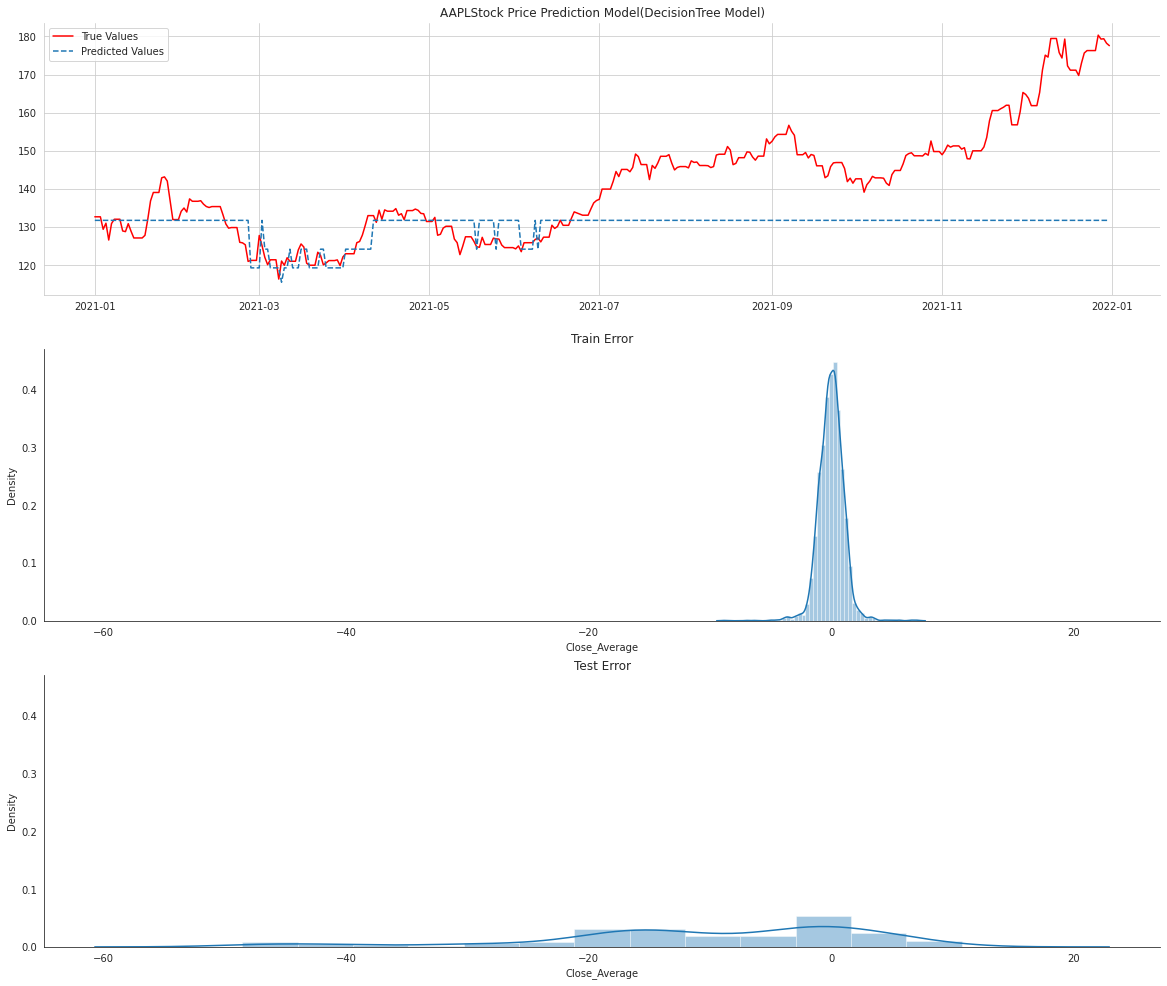

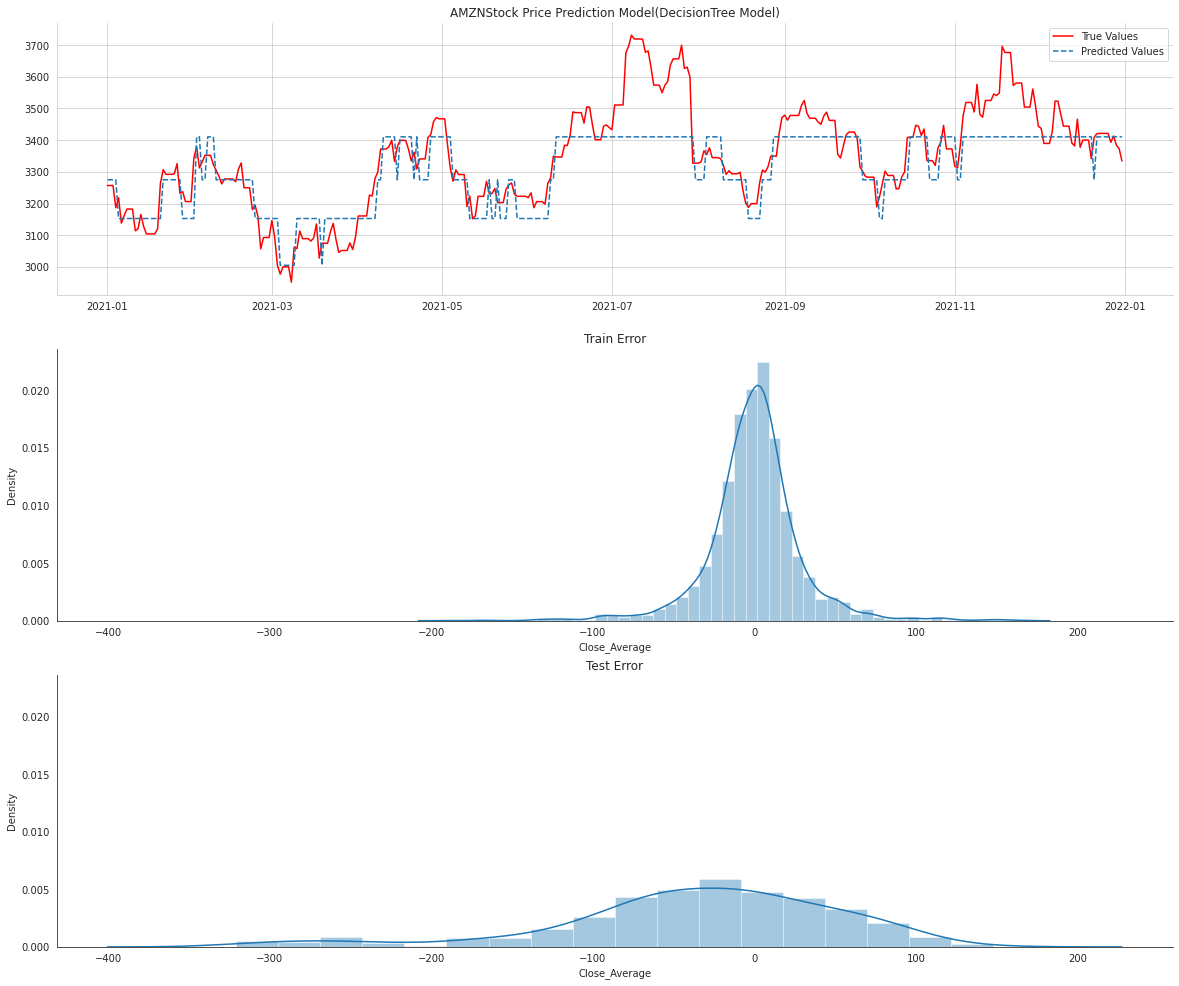

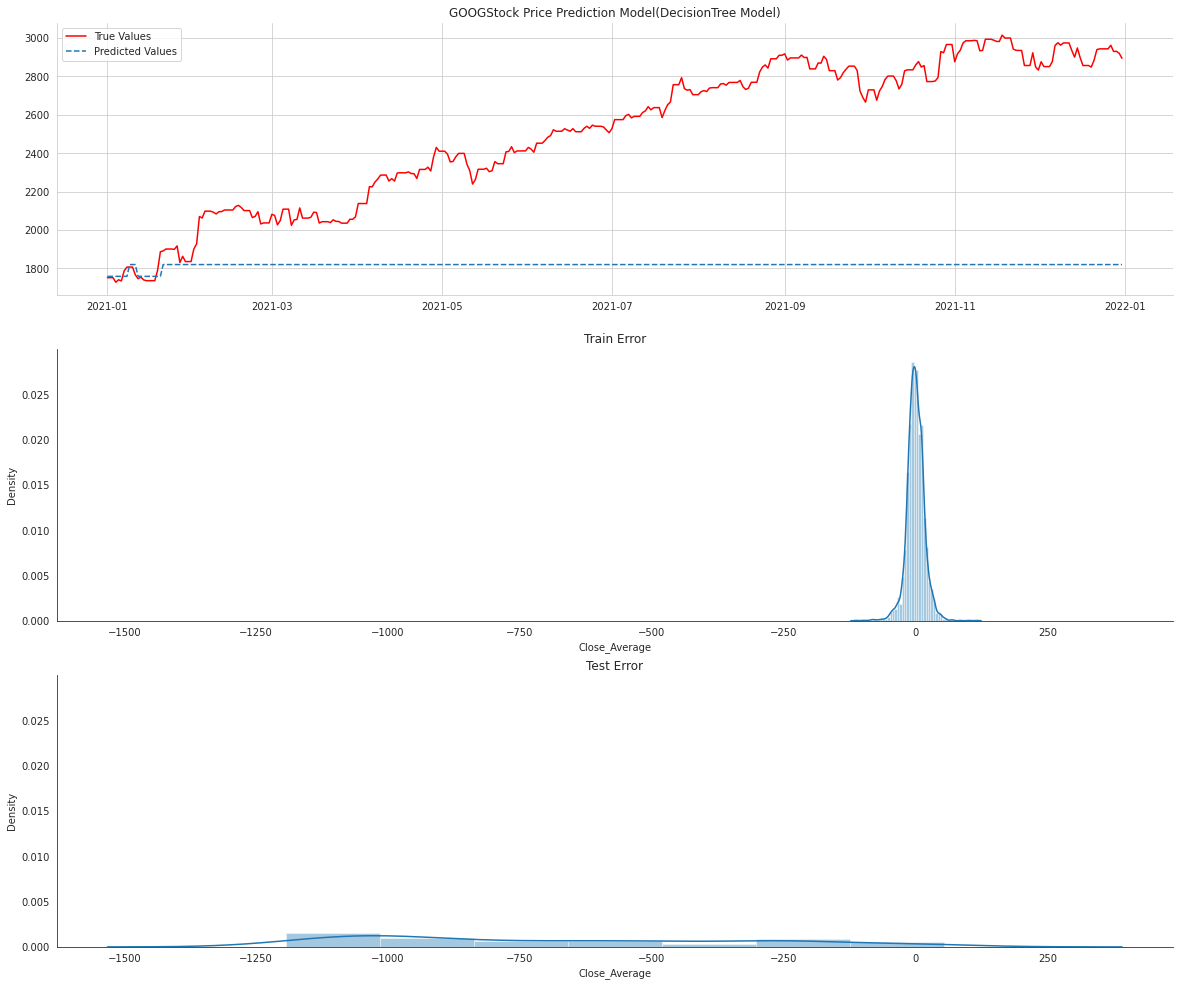

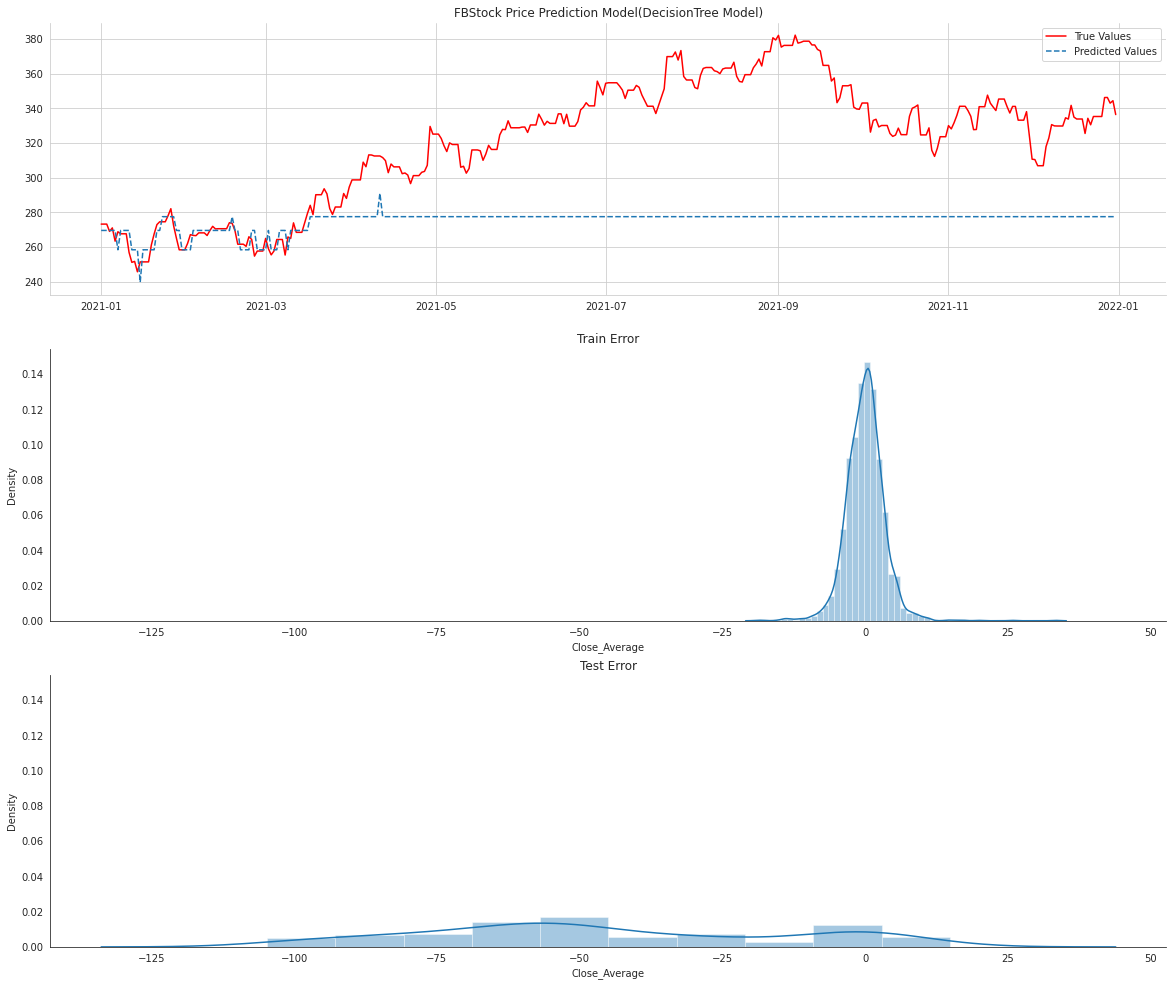

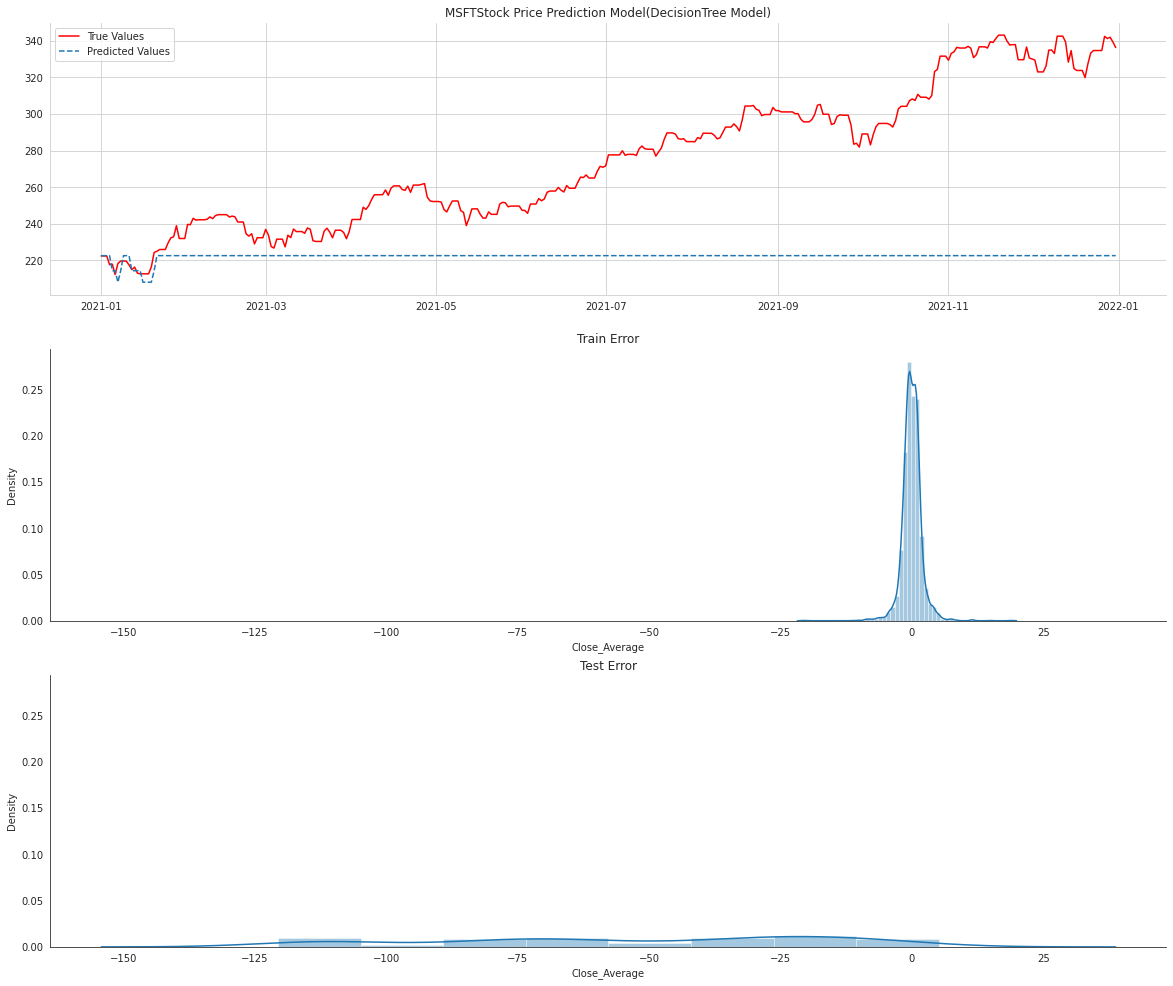

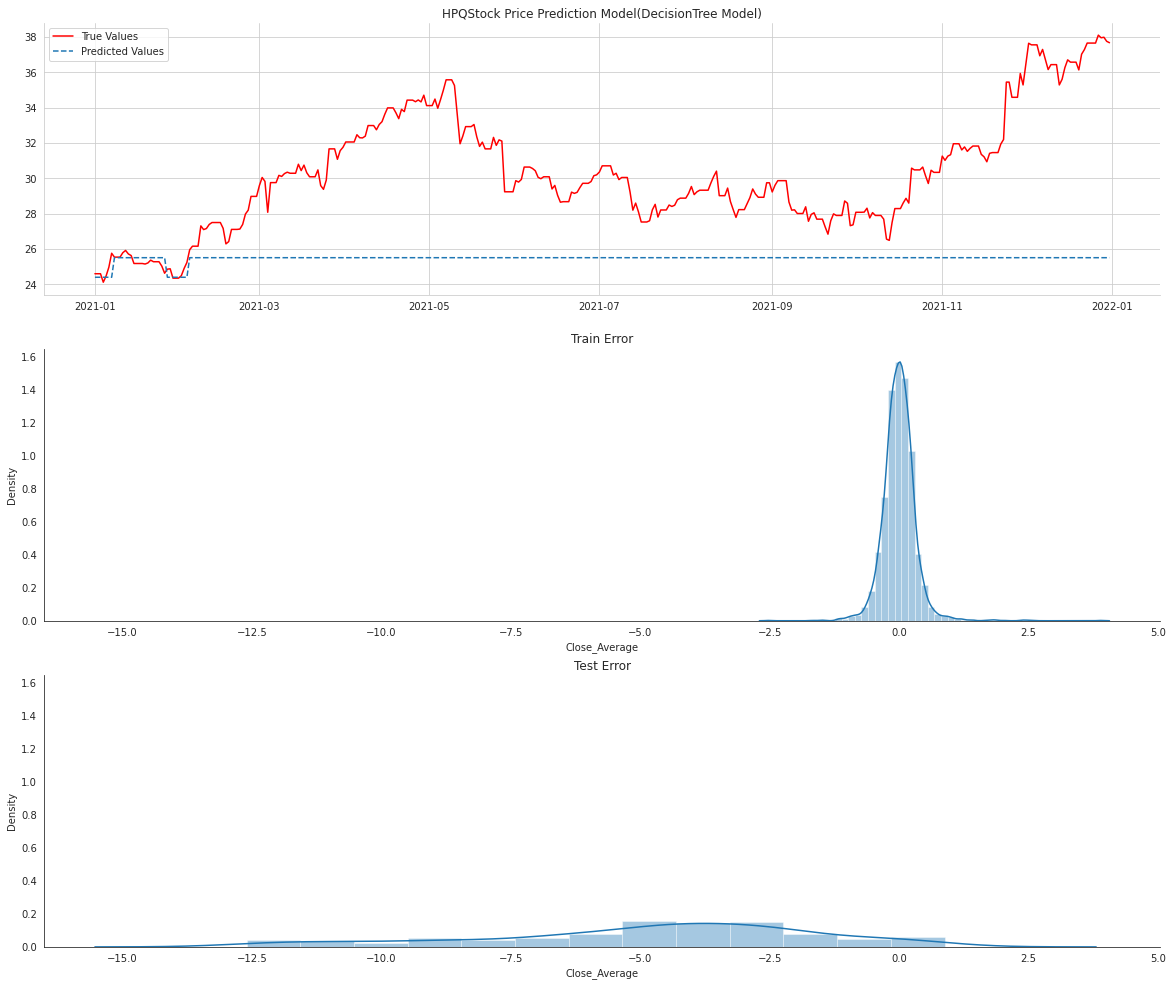

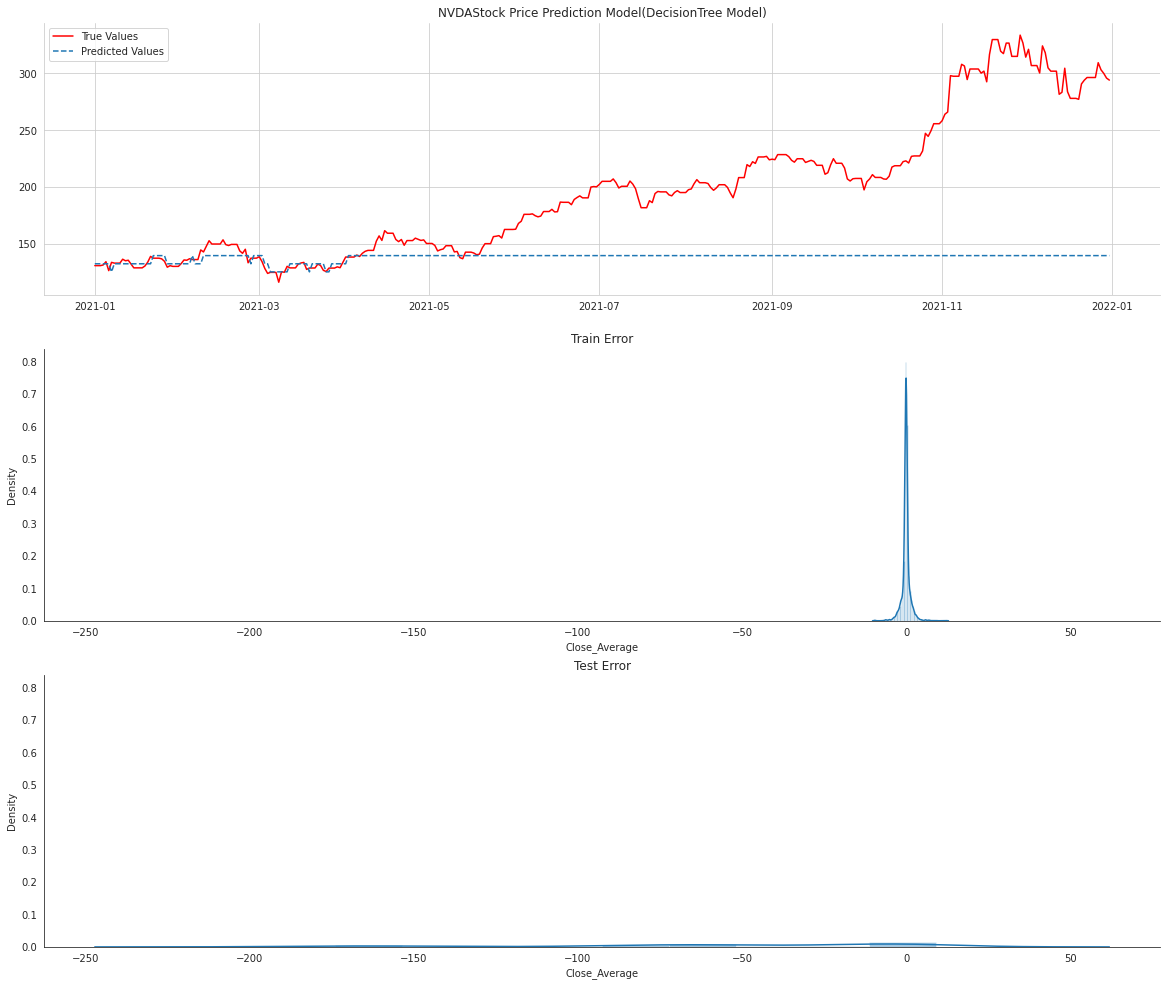

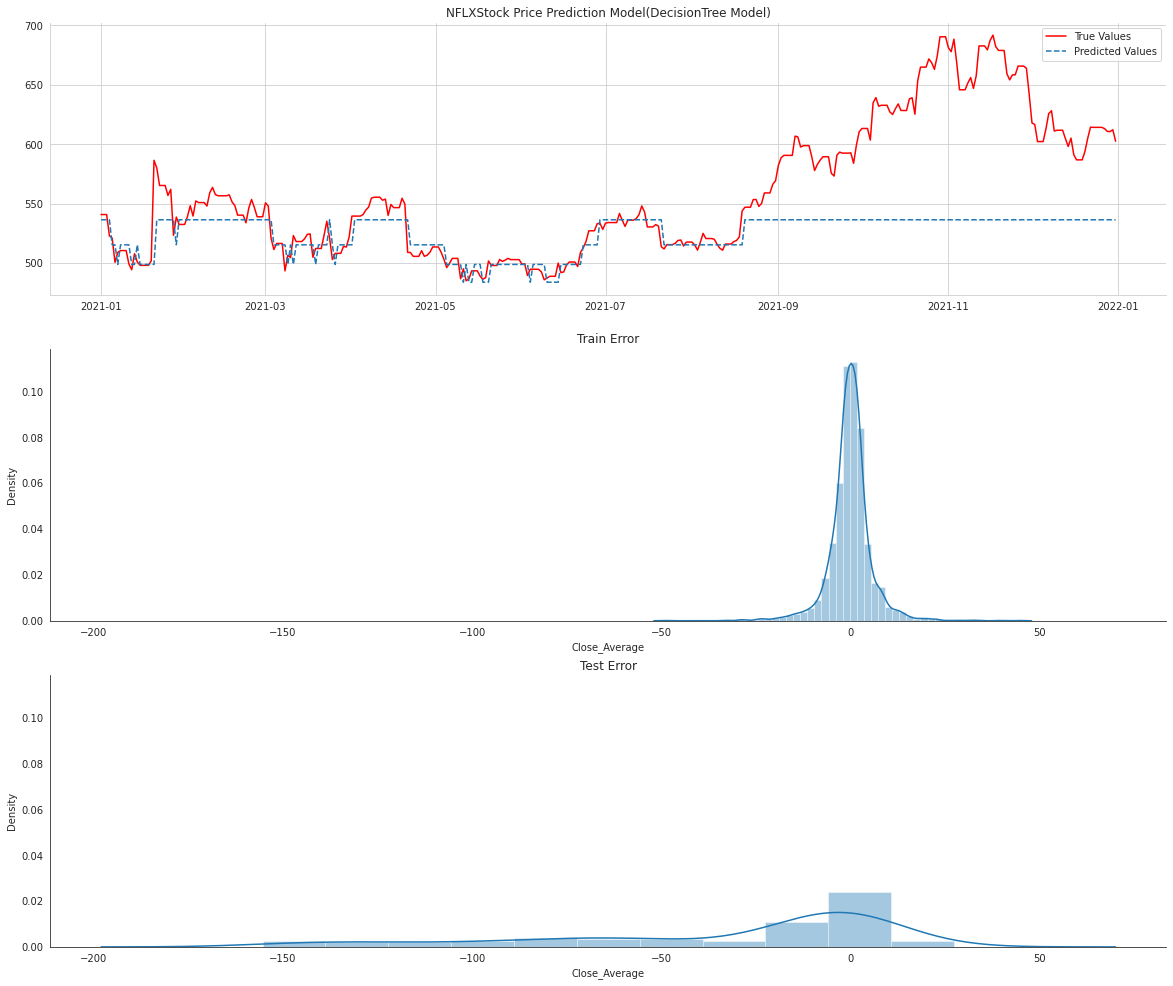

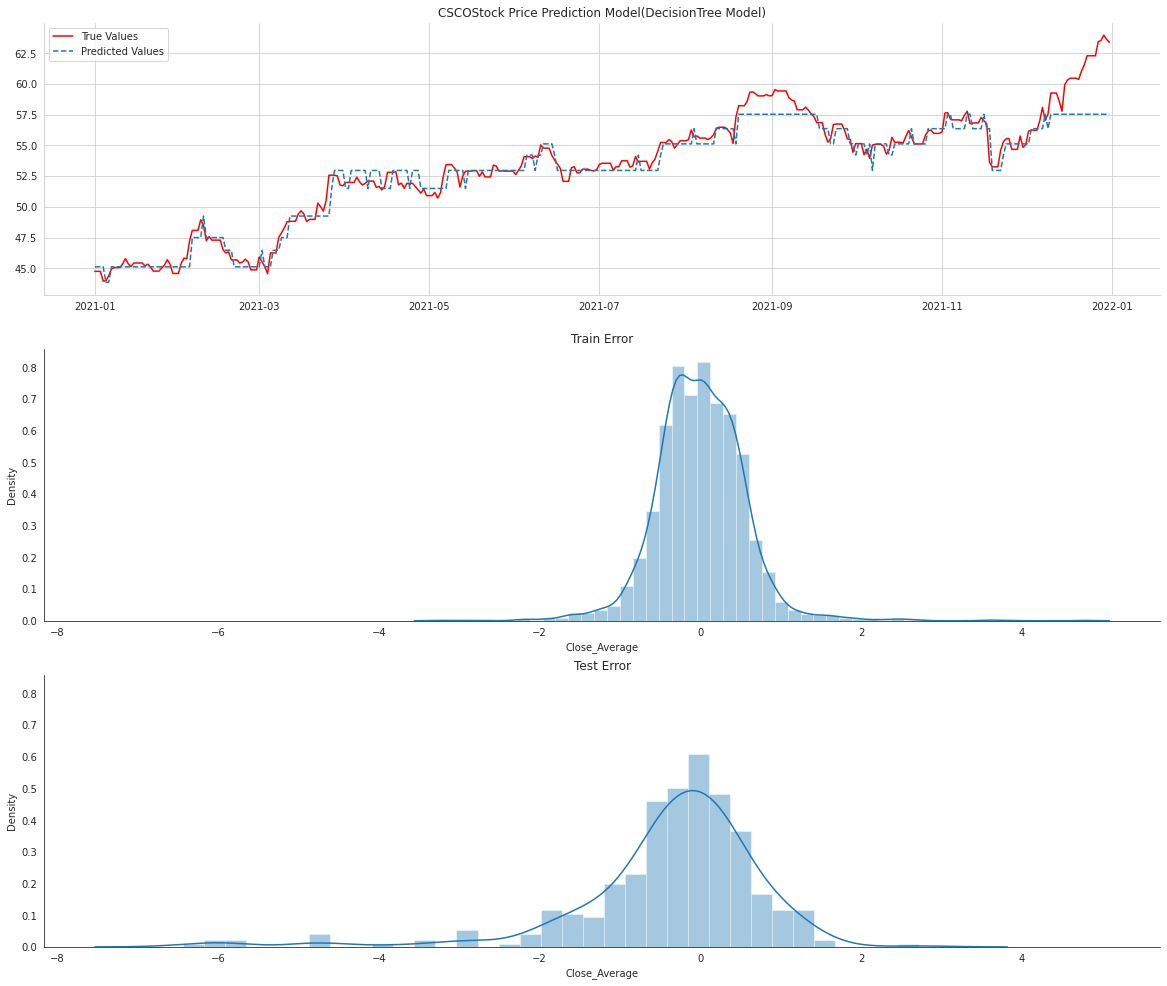

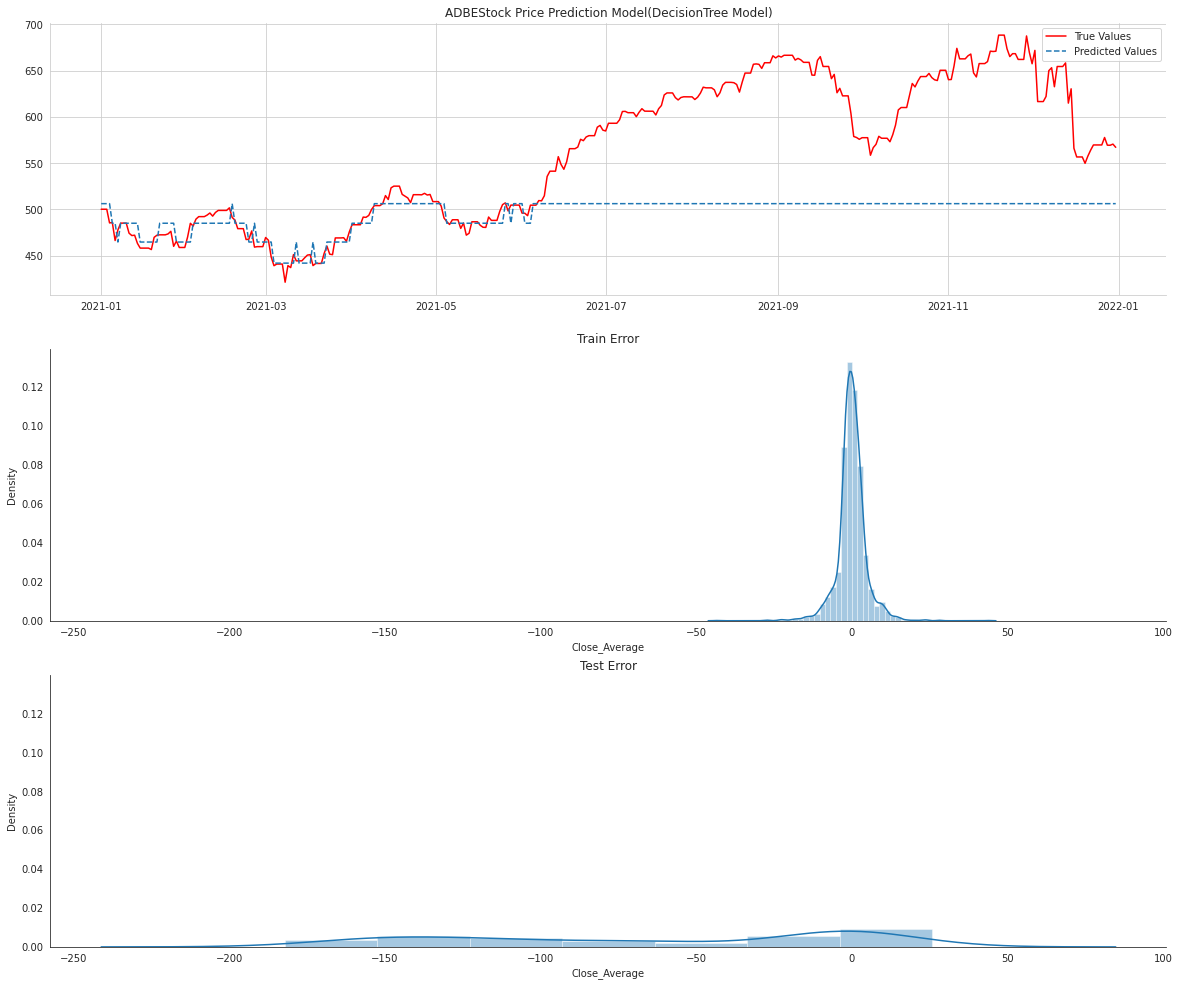

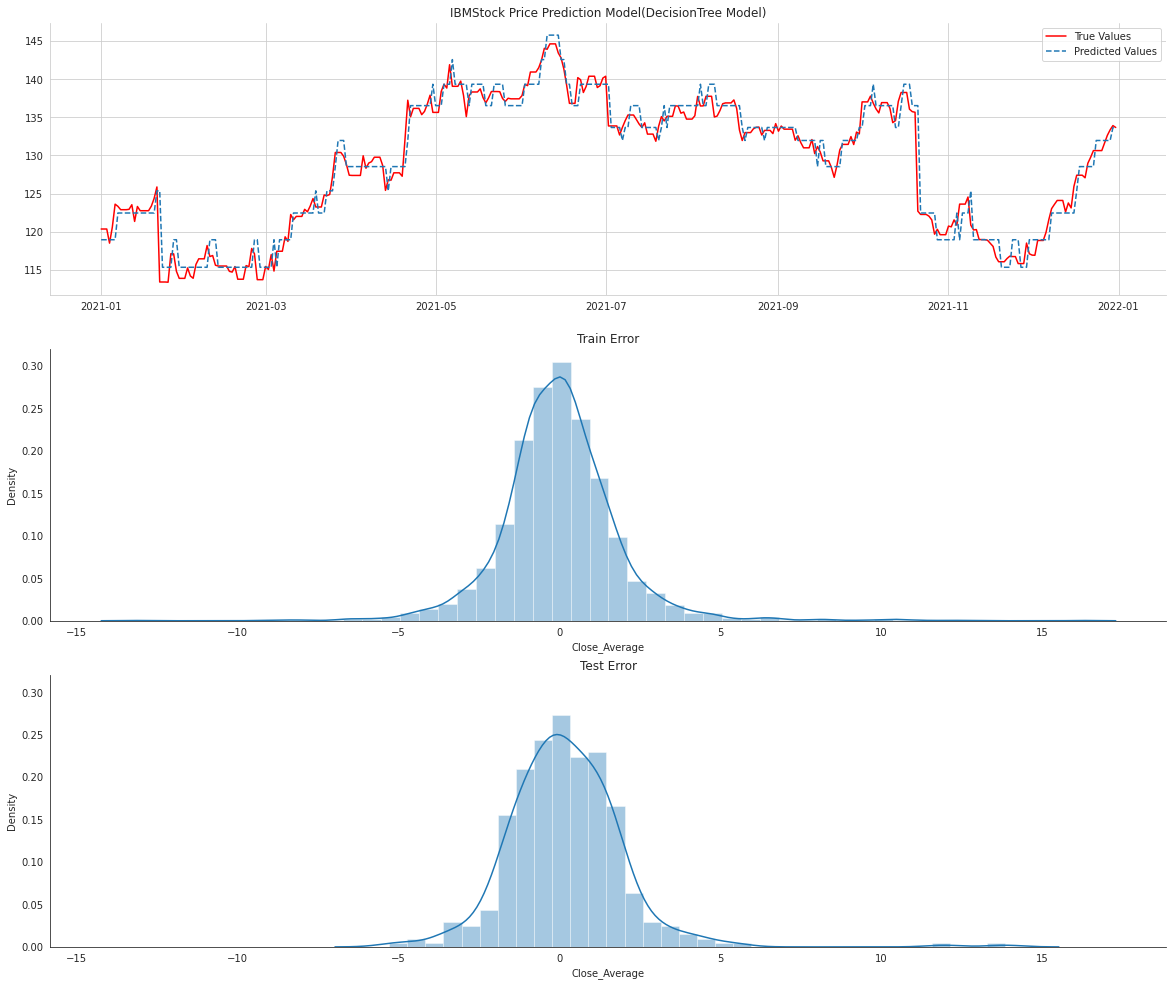

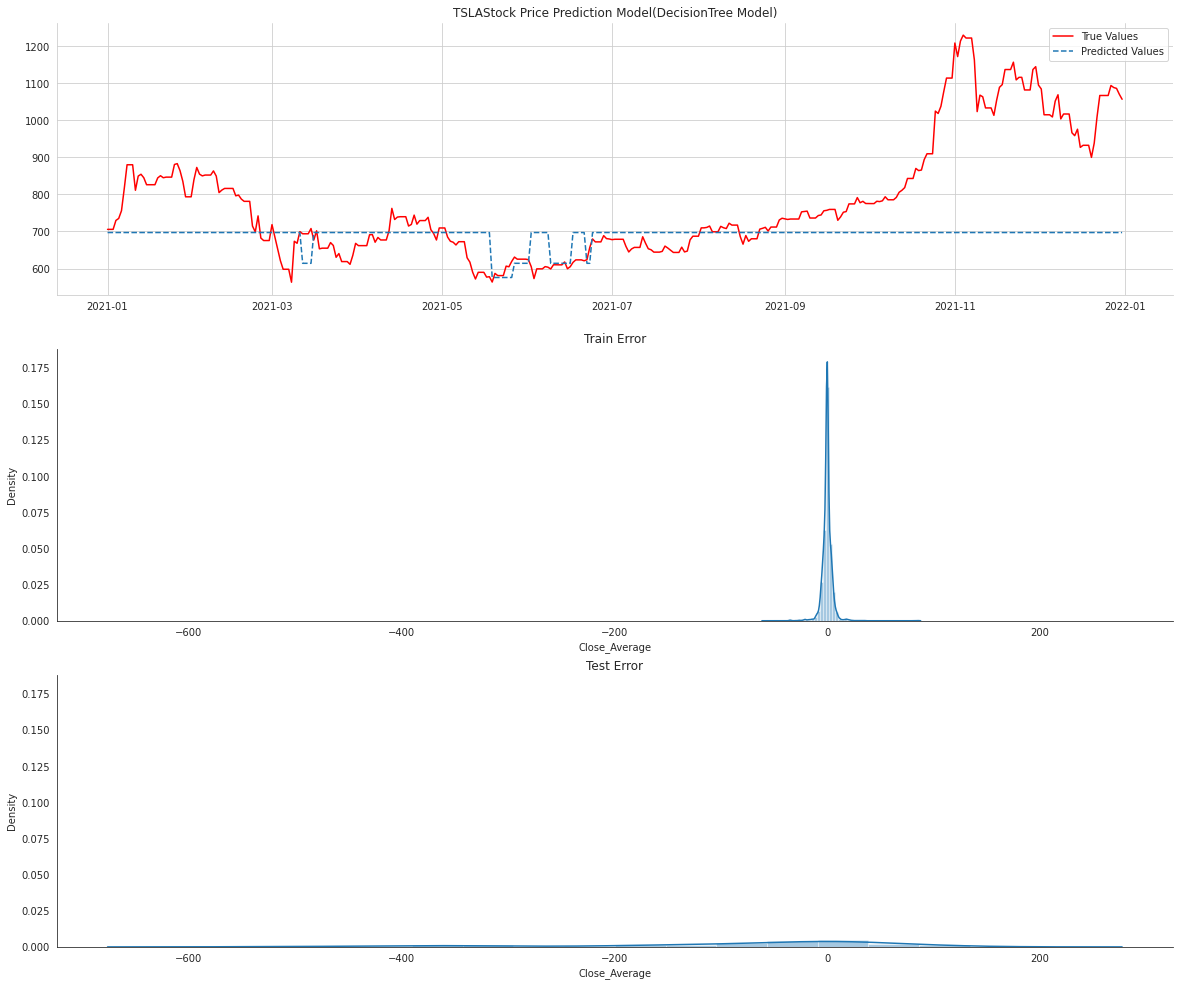

In [17]:
for i in range(len(IT_Companies)):
  fig=plt.figure(figsize=(20,17))
  ax1 = plt.subplot(311)
  plt.plot(X[i]['2021-01-01':].index,ytest[i], 'r')
  plt.plot(X[i]['2021-01-01':].index,treePredictions[i].squeeze(),ls='--')
  plt.legend(["True Values","Predicted Values"])
  ax1.set_title(IT_Companies_names[i]+'Stock Price Prediction Model(DecisionTree Model)')

  with sns.axes_style("white"):
      ax2 = plt.subplot(312)
      ax4 = plt.subplot(313, sharex = ax2, sharey=ax2)
      sns.distplot(treePredictions_train[i].squeeze()- ytrain[i], ax=ax2)
      ax2.set_title('Train Error')
      sns.distplot(treePredictions[i].squeeze()-ytest[i], ax=ax4)
      ax4.set_title('Test Error')
  sns.despine()

In [18]:
k={}
s={}
for i in range(len(IT_Companies)):
  IT_Companies[i]['Close_Average'].plot(lw=1, ax=ax1, c='r')
  t=treePredictions[i].squeeze()-ytest[i]
  k[IT_Companies_names[i]]=t.kurtosis()
  s[IT_Companies_names[i]]=t.skew()

<BarContainer object of 12 artists>

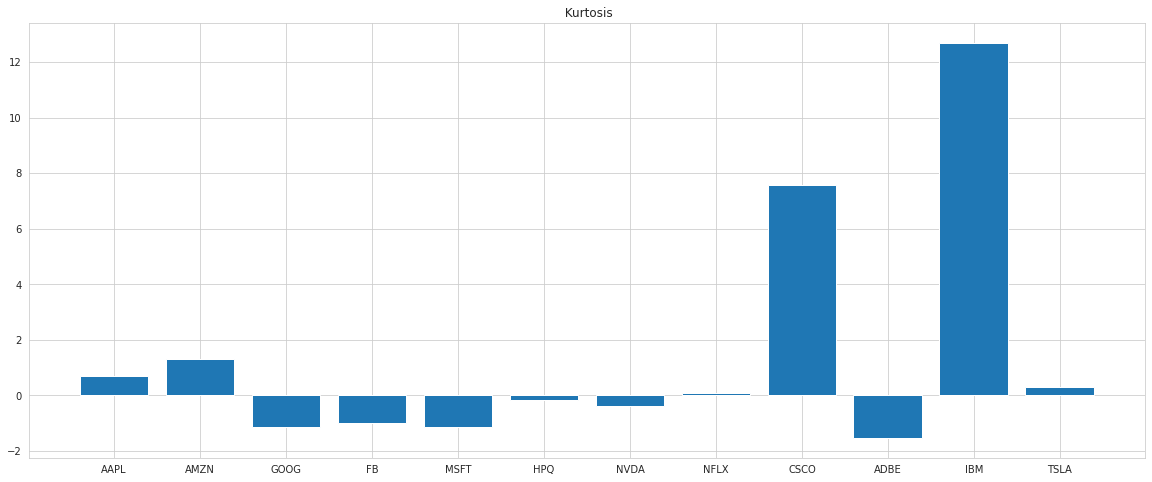

In [19]:
plt.figure(figsize=(20, 8))
plt.title(" Kurtosis")

plt.bar(k.keys(),k.values())

<BarContainer object of 12 artists>

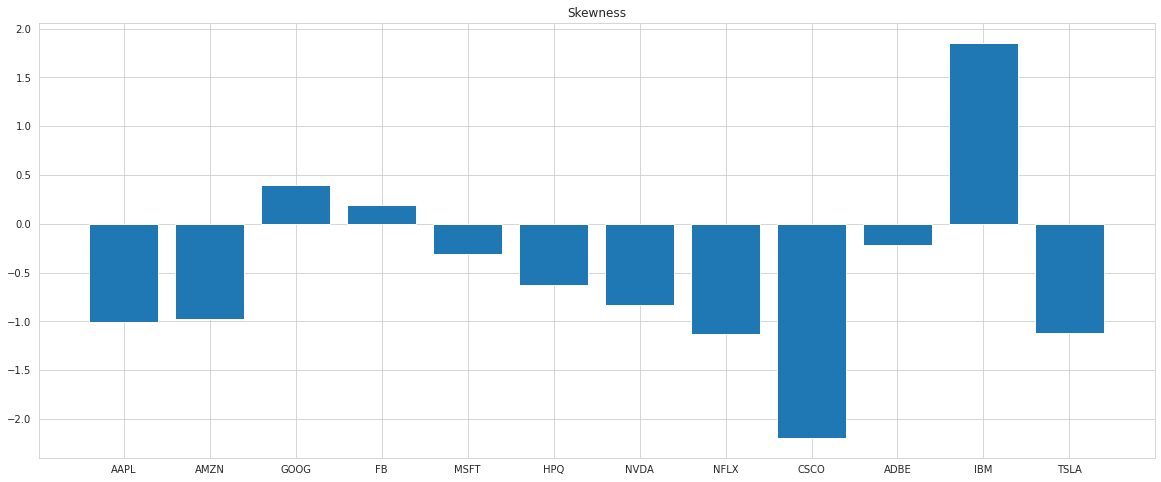

In [20]:
plt.figure(figsize=(20, 8))
plt.title("Skewness")
plt.bar(s.keys(),s.values())

In [21]:
#prediction for next 7 days
last_output_arr=[[] for i in range(30)]
future_days=7
for j in range(len(IT_Companies)):
  i=0
  B=np.append(xtest[j][-1],ytest[j][-1])
  B=B[1:]
  while i<future_days:
    B=B.reshape(1,window_size)
    yhat = models[j].predict(B)
    last_output_arr[j].append(yhat[0])
    B=B.reshape(window_size,1)
    B=np.append(B[1:],yhat)
    i=i+1

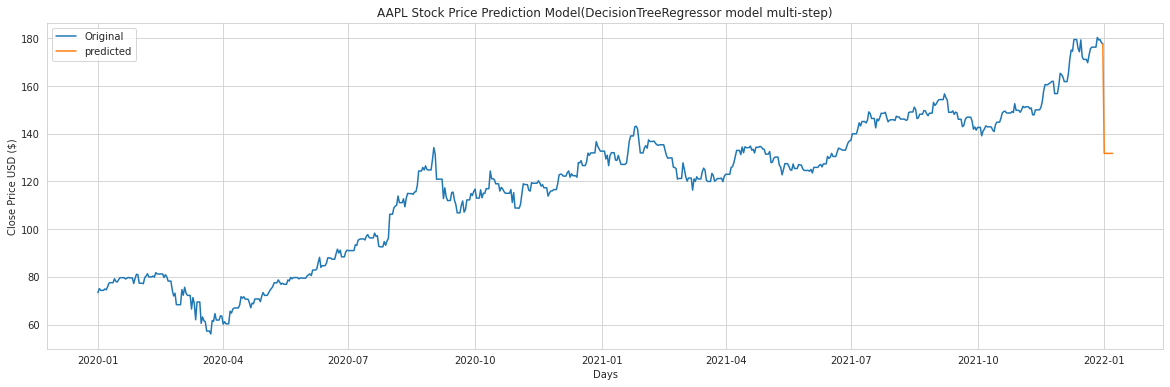

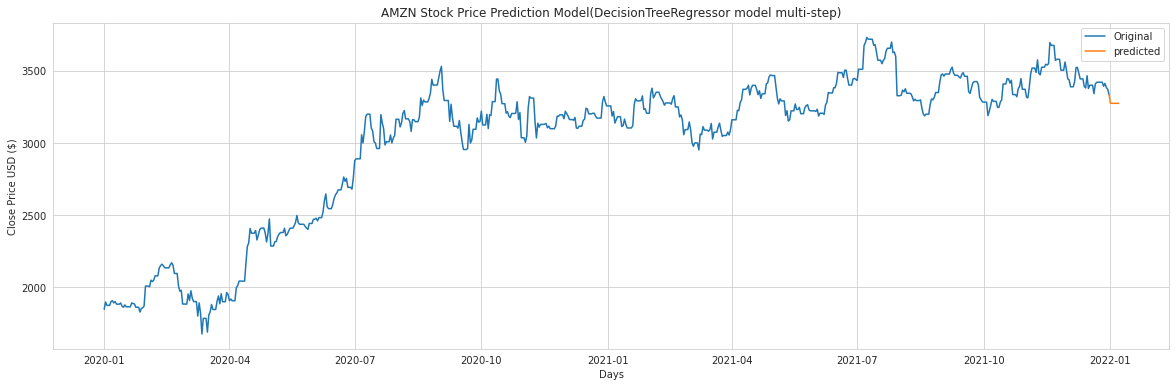

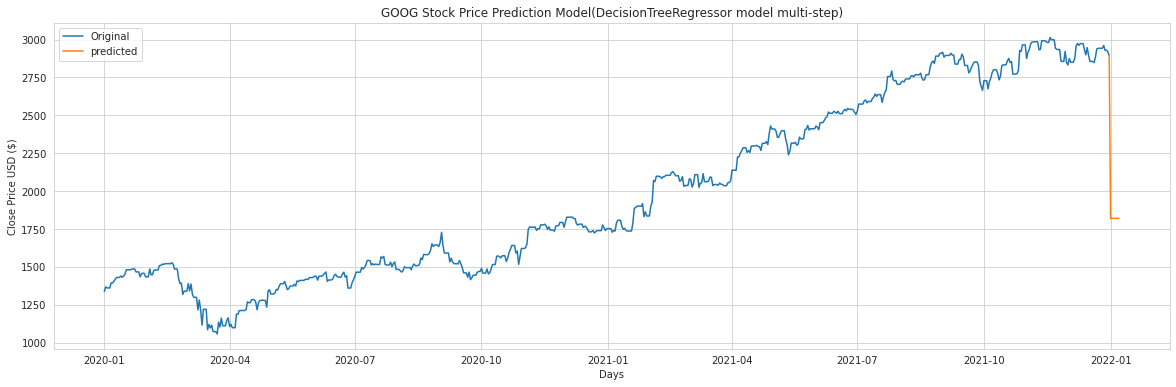

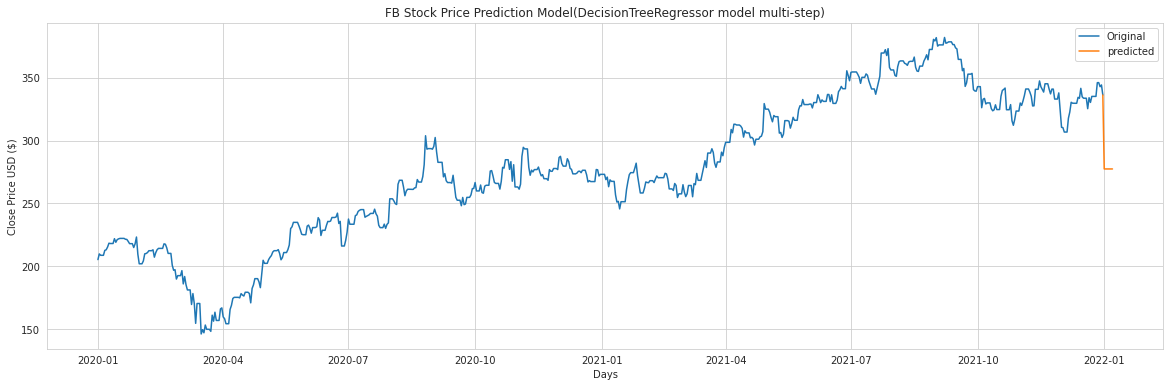

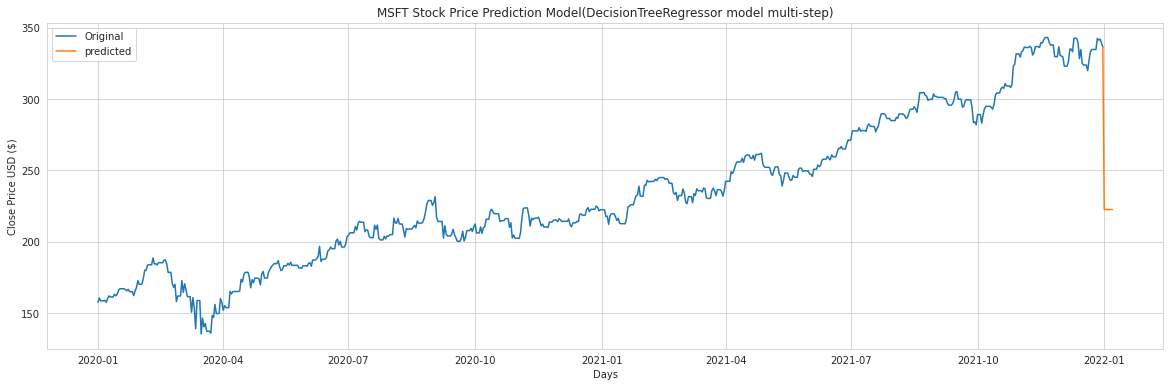

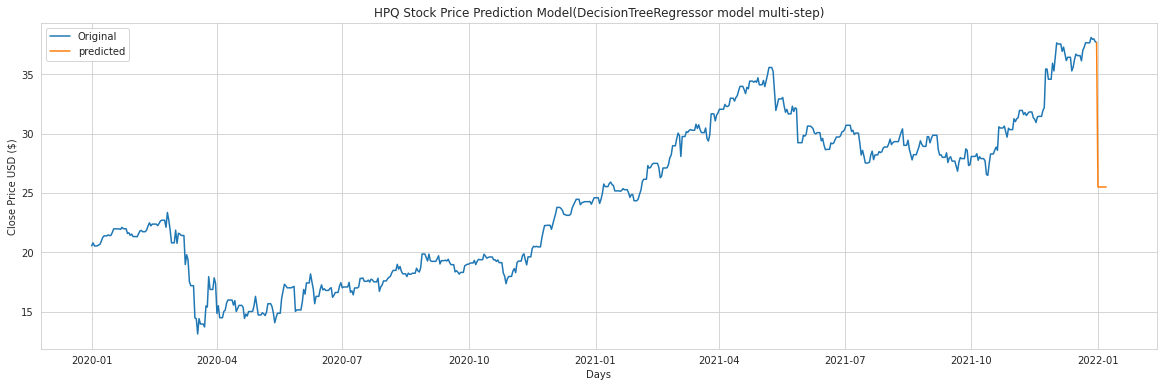

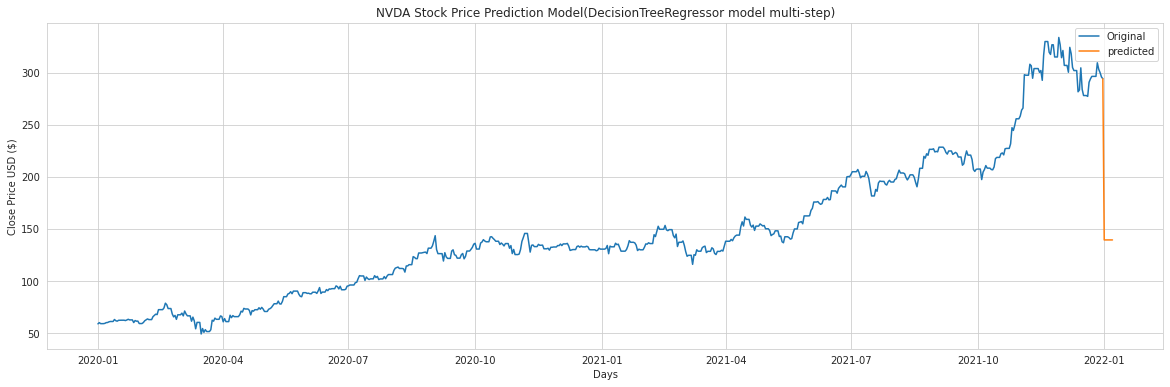

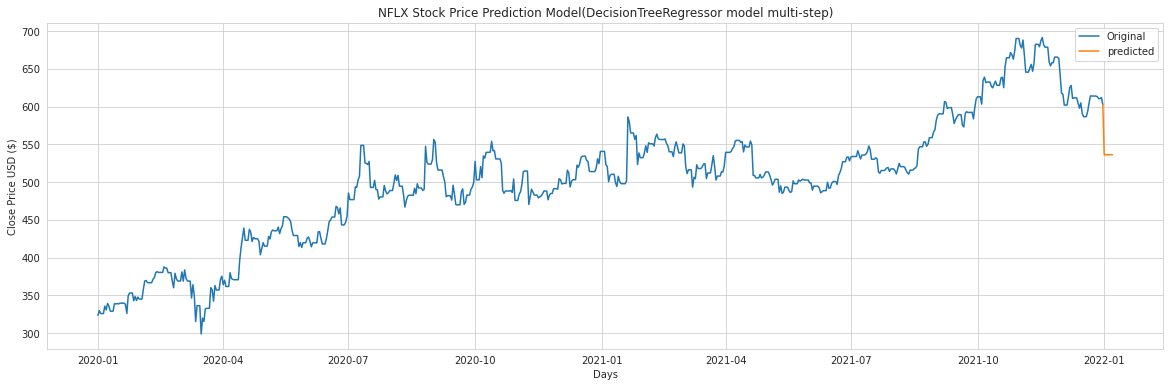

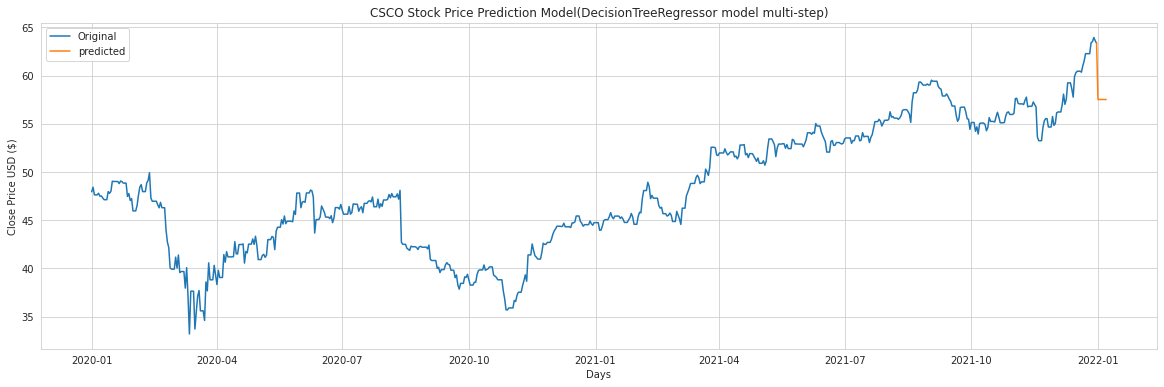

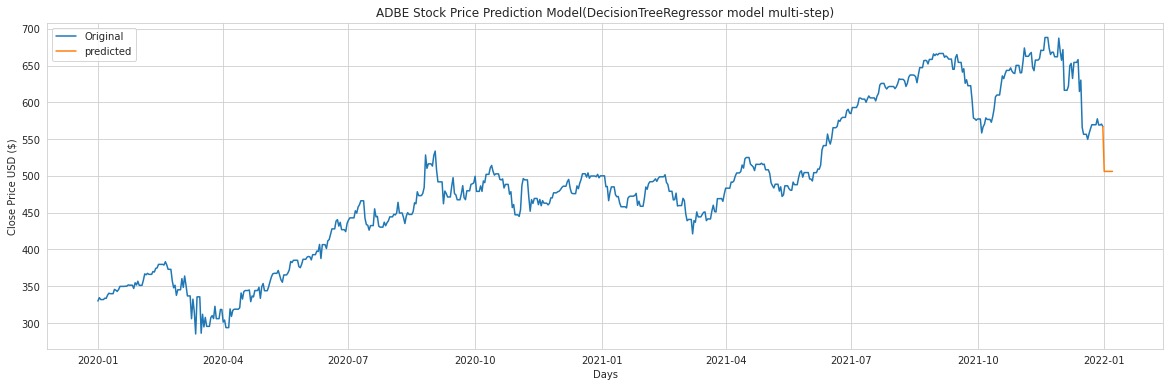

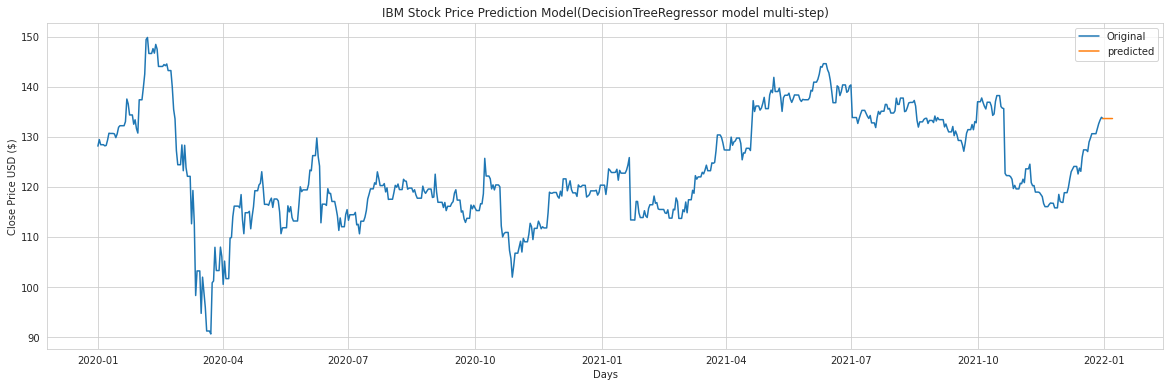

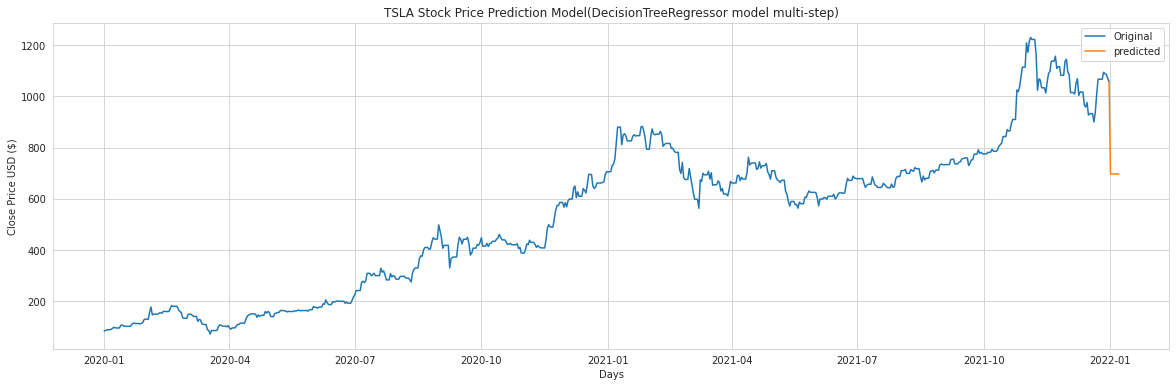

In [22]:
#visualization for next 7 days
mydates = pd.date_range(start='2021-12-31',periods=future_days+1).tolist()
future_predicts=[]
future_predict_frame=[]
for i in range(len(IT_Companies)):
  future_predicts.append(pd.Series((np.concatenate((np.array([IT_Companies[i]['Close_Average'].iloc[-1]]),np.array(last_output_arr[i])))).reshape(future_days+1,), index=mydates))
  future_predict_frame.append(future_predicts[i].to_frame())
  future_predict_frame[i]=future_predict_frame[i].rename(columns={0: IT_Companies_names[i]})

for i in range(len(IT_Companies)):
  plt.figure(figsize=(20, 6))
  plt.title(IT_Companies_names[i]+" Stock Price Prediction Model(DecisionTreeRegressor model multi-step)")
  plt.xlabel("Days")
  plt.ylabel("Close Price USD ($)")
  plt.plot(IT_Companies[i]['2020':]['Close_Average'])
  plt.plot(future_predict_frame[i])
  plt.legend(["Original", "predicted"])
  plt.show()